In [1]:
#Kaggle Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [184]:
data=pd.read_excel('WA_Fn-UseC_-Telco-Customer-Churn.xlsx')

In [185]:
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [186]:
for i in data.columns[data.dtypes == 'object']:
    print("Column Name: {}\n{}".format( i,data[i].unique()))

Column Name: customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column Name: gender
['Female' 'Male']
Column Name: Partner
['Yes' 'No']
Column Name: Dependents
['No' 'Yes']
Column Name: PhoneService
['No' 'Yes']
Column Name: MultipleLines
['No phone service' 'No' 'Yes']
Column Name: InternetService
['DSL' 'Fiber optic' 'No']
Column Name: OnlineSecurity
['No' 'Yes' 'No internet service']
Column Name: OnlineBackup
['Yes' 'No' 'No internet service']
Column Name: DeviceProtection
['No' 'Yes' 'No internet service']
Column Name: TechSupport
['No' 'Yes' 'No internet service']
Column Name: StreamingTV
['No' 'Yes' 'No internet service']
Column Name: StreamingMovies
['No' 'Yes' 'No internet service']
Column Name: Contract
['Month-to-month' 'One year' 'Two year']
Column Name: PaperlessBilling
['Yes' 'No']
Column Name: PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Column Name: TotalCharges
[29.8

In [187]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [188]:
data.columns[data.dtypes=='object'].nunique()

18

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64 %


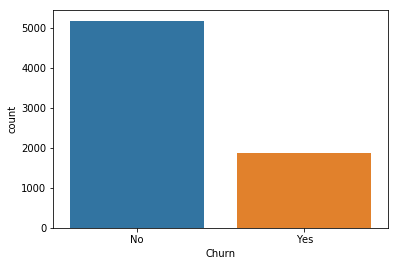

In [189]:
print(data.Churn.value_counts(normalize=True)*100,'%')
sns.countplot(data.Churn)
plt.show()

### We see that not more than 26 % of cutomers churned. This shows that data is highly imbalanced. Therefore this need to be treated using Sampling

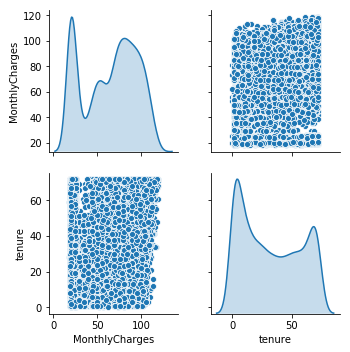

In [9]:
sns.pairplot(pd.DataFrame(data[['MonthlyCharges','tenure']]),diag_kind='kde')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

## Target Is whether cutomer will Churn or not.

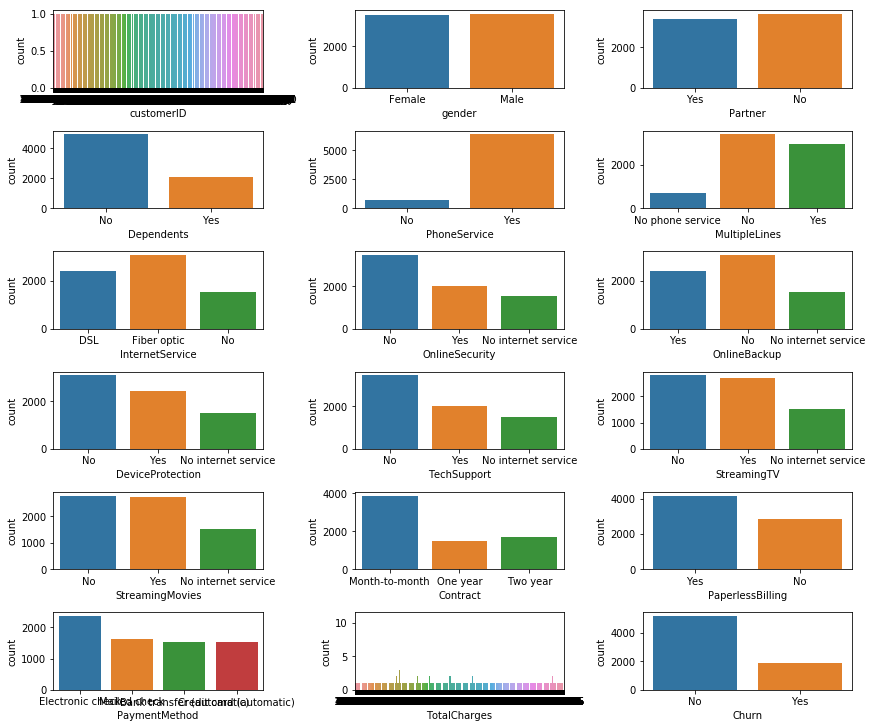

In [11]:
figs,axes=plt.subplots(6,3,figsize=[12,10], constrained_layout=True)
axes=axes.flat
for i,j in zip(data.columns[data.dtypes=='object'],axes):
    
    sns.countplot(data[i],ax=j)
plt.show()

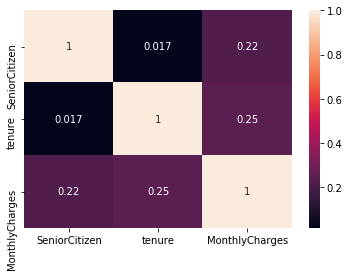

In [190]:
sns.heatmap(data.corr(),annot=True)

In [191]:
data.SeniorCitizen.value_counts(normalize=True)*100

0    83.785319
1    16.214681
Name: SeniorCitizen, dtype: float64

In [192]:
data['SeniorCitizen']=data.SeniorCitizen.map({1:'1',0:'0'})

In [193]:
#### Only 16 % of the total samples is Senior citizens 

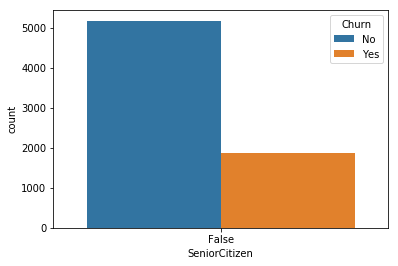

In [194]:
sns.countplot(data.SeniorCitizen==1,hue=data.Churn)

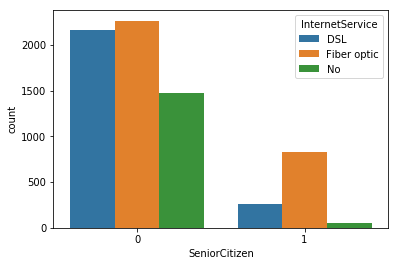

In [195]:
sns.countplot(data.SeniorCitizen,hue=data.InternetService)

In [196]:
data.TotalCharges.astype(int)

ValueError: invalid literal for int() with base 10: ' '

In [197]:
data.TotalCharges.replace(' ',np.nan,inplace=True)

In [198]:
data[(data['TotalCharges']!=0) & (data['Contract']=='Two year')]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.80,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
17,9959-WOFKT,Male,0,No,Yes,71,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.70,7382.25,No
23,3638-WEABW,Female,0,Yes,No,58,Yes,Yes,DSL,No,...,No,Yes,No,No,Two year,Yes,Credit card (automatic),59.90,3505.10,No
28,5248-YGIJN,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),90.25,6369.45,No
30,3841-NFECX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No
35,6234-RAAPL,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,No,Two year,No,Bank transfer (automatic),99.90,7251.70,No
41,9489-DEDVP,Female,0,Yes,Yes,70,Yes,Yes,DSL,Yes,...,No,No,Yes,No,Two year,Yes,Credit card (automatic),69.20,4872.35,No
43,4671-VJLCL,Female,0,No,No,63,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Credit card (automatic),79.85,4861.45,No
48,7639-LIAYI,Male,0,No,No,52,Yes,Yes,DSL,Yes,...,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),79.75,4217.80,No


#### We see a pattern that TotalCharges/ MonthlyCharges  = Tenure
#### So using the same pattern to fill values in TotalCharges column where we have null

## Missing Values

In [199]:
data.TotalCharges.isnull().sum()

11

In [200]:
data.TotalCharges.fillna(data["tenure"]*data['MonthlyCharges'],inplace=True)

In [201]:
data.TotalCharges.dtypes

dtype('float64')

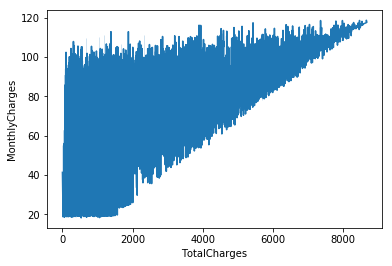

In [202]:
sns.lineplot(x=data['TotalCharges'],y=data['MonthlyCharges'])
plt.show()

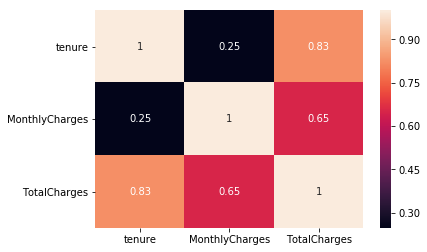

In [203]:
sns.heatmap(data.corr(),annot=True)

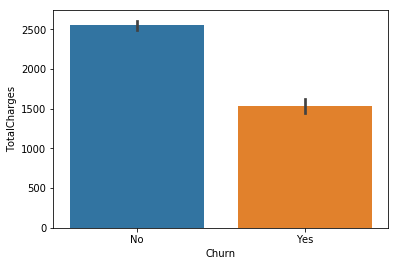

In [204]:
sns.barplot(x=data.Churn,y=data.TotalCharges)

In [205]:
# this shows average Bill of customers who churn and not churn

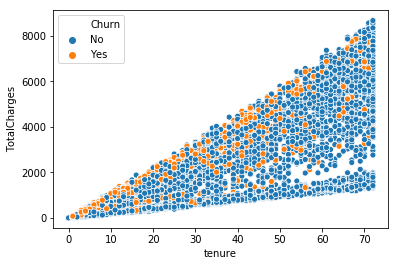

In [206]:
figs,axes=plt.subplots()
sns.scatterplot(x=data.tenure,y=data.TotalCharges,hue=data.Churn)

In [207]:
data['CustomerCode']=data['customerID'].str.split("-").str[1]
data['CustomerCode'].value_counts()
data[(data['CustomerCode']=="CYWMH") | (data['CustomerCode']=="GSODA") |(data['CustomerCode']=="VUVJN")]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,CustomerCode
2166,2931-VUVJN,Female,1,Yes,No,59,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,One year,Yes,Electronic check,94.05,5483.90,No,VUVJN
3558,8417-GSODA,Male,0,Yes,Yes,28,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,No,Bank transfer (automatic),92.20,2568.15,No,GSODA
5481,8473-VUVJN,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,73.65,73.65,Yes,VUVJN
5624,4462-CYWMH,Male,1,Yes,No,62,Yes,Yes,Fiber optic,No,...,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),89.80,5629.55,No,CYWMH
5754,1431-CYWMH,Female,0,Yes,Yes,22,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),19.05,454.05,No,CYWMH
6383,2335-GSODA,Male,0,No,Yes,23,No,No phone service,DSL,Yes,...,Yes,No,No,Two year,No,Mailed check,40.10,857.75,No,GSODA


##### Not using PCA for dimension reduction as we can see mostly the Categorical columns are present in the Dataset

### Statistical tests for feature reduction


In [208]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [209]:
print(pd.crosstab(data["OnlineSecurity"],data["Churn"]))
chi2_contingency(pd.crosstab(data["OnlineSecurity"],data["Churn"]))

Churn                  No   Yes
OnlineSecurity                 
No                   2037  1461
No internet service  1413   113
Yes                  1724   295


(849.9989679615965,
 2.661149635176552e-185,
 2,
 array([[2569.73619196,  928.26380804],
        [1121.04557717,  404.95442283],
        [1483.21823087,  535.78176913]]))

In [210]:
print(pd.crosstab(data["InternetService"],data["Churn"]))
chi2_contingency(pd.crosstab(data["InternetService"],data["Churn"]))

Churn              No   Yes
InternetService            
DSL              1962   459
Fiber optic      1799  1297
No               1413   113


(732.309589667794,
 9.571788222840544e-160,
 2,
 array([[1778.53954281,  642.46045719],
        [2274.41488002,  821.58511998],
        [1121.04557717,  404.95442283]]))

In [211]:
pd.crosstab(data["gender"],data["Churn"])


Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [212]:
chi2_contingency(pd.crosstab(data["gender"],data["Churn"]))

(0.4840828822091383,
 0.48657873605618596,
 1,
 array([[2562.38989067,  925.61010933],
        [2611.61010933,  943.38989067]]))

In [213]:
print(pd.crosstab(data["SeniorCitizen"],data["Churn"]))
chi2_contingency(pd.crosstab(data["SeniorCitizen"],data["Churn"]))

Churn            No   Yes
SeniorCitizen            
0              4508  1393
1               666   476


(159.42630036838742,
 1.510066805092378e-36,
 1,
 array([[4335.05239245, 1565.94760755],
        [ 838.94760755,  303.05239245]]))

In [214]:
print(pd.crosstab(data["Partner"],data["Churn"]))
chi2_contingency(pd.crosstab(data["Partner"],data["Churn"]))

Churn      No   Yes
Partner            
No       2441  1200
Yes      2733   669


(158.7333820309922,
 2.1399113440759935e-36,
 1,
 array([[2674.78830044,  966.21169956],
        [2499.21169956,  902.78830044]]))

In [215]:
print(pd.crosstab(data["Dependents"],data["Churn"]))
chi2_contingency(pd.crosstab(data["Dependents"],data["Churn"]))

Churn         No   Yes
Dependents            
No          3390  1543
Yes         1784   326


(189.12924940423474,
 4.9249216612154196e-43,
 1,
 array([[3623.93042737, 1309.06957263],
        [1550.06957263,  559.93042737]]))

In [216]:
pd.crosstab(data["PhoneService"],data["Churn"])


Churn,No,Yes
PhoneService,,
No,512,170
Yes,4662,1699


In [217]:
chi2_contingency(pd.crosstab(data["PhoneService"],data["Churn"]))

(0.9150329892546948,
 0.3387825358066928,
 1,
 array([[ 501.01774812,  180.98225188],
        [4672.98225188, 1688.01774812]]))

In [218]:
print(pd.crosstab(data["StreamingTV"],data["Churn"]))
chi2_contingency(pd.crosstab(data["StreamingTV"],data["Churn"]))

Churn                  No  Yes
StreamingTV                   
No                   1868  942
No internet service  1413  113
Yes                  1893  814


(374.2039433109813,
 5.528994485739183e-82,
 2,
 array([[2064.31066307,  745.68933693],
        [1121.04557717,  404.95442283],
        [1988.64375976,  718.35624024]]))

### Only two columns(Gender and Phone Service) pass the chiSquare Test so dropping those columns

In [219]:
## To Know why people Churn
x=data.drop(["Churn",'customerID','CustomerCode','gender','PhoneService'],axis=1)
y=pd.DataFrame(data.Churn)
y.head(2)

,Churn
0,No
1,No


# Model and One hot encoding

In [220]:
y['Churn']=y['Churn'].map({"No":0,"Yes":1})
x=pd.get_dummies(x,drop_first=True)
x.head(2)

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


# importing SMOTE

In [221]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# applying SMOTE to our data and checking the class counts
X_resampled, y_resampled = SMOTE().fit_resample(x, y)
print(sorted(Counter(y_resampled).items()))

[(0, 5174), (1, 5174)]


C:\Users\sja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Splitting

In [222]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_resampled, y_resampled,test_size=0.3,random_state=2)
print("xtrain",xtrain.shape)
print("ytrain",ytrain.shape)
print("ytest",ytest.shape)
print("xtest",xtest.shape)

xtrain (7243, 28)
ytrain (7243,)
ytest (3105,)
xtest (3105, 28)


# DecisionTree

In [223]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',min_samples_split=0.1,max_depth=5,max_features=9)
classifier.fit(xtrain,ytrain)
y_pred_DT=classifier.predict(xtest)

In [224]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [225]:
print("accuracy: \n",accuracy_score(ytest,y_pred_DT)*100)
print("Classification Report: \n",classification_report(ytest, y_pred_DT))
print("Confusion Matrix \n",confusion_matrix(ytest,y_pred_DT))

accuracy: 
 77.03703703703704
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.70      0.76      1567
           1       0.74      0.84      0.78      1538

   micro avg       0.77      0.77      0.77      3105
   macro avg       0.78      0.77      0.77      3105
weighted avg       0.78      0.77      0.77      3105

Confusion Matrix 
 [[1103  464]
 [ 249 1289]]


# Random Forest

In [226]:
from sklearn.ensemble import RandomForestClassifier

In [227]:
Classifier = RandomForestClassifier(n_estimators=10, random_state=2)
Classifier.fit(xtrain, ytrain)
y_pred_RF = Classifier.predict(xtest)


In [228]:
print("accuracy: \n",round(accuracy_score(ytest,y_pred_RF)*100,1))
print("Classification Report: \n",classification_report(ytest, y_pred_RF))
print("Confusion Matrix \n",confusion_matrix(ytest,y_pred_RF))

accuracy: 
 84.5
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1567
           1       0.86      0.81      0.84      1538

   micro avg       0.85      0.85      0.85      3105
   macro avg       0.85      0.84      0.84      3105
weighted avg       0.85      0.85      0.84      3105

Confusion Matrix 
 [[1371  196]
 [ 285 1253]]


In [238]:
Recall= 1253/(1253+285)
Precision=1253/(1253+196)
print("Recall is: ", Recall," \n", "Precision is:", Precision)

Recall is:  0.8146944083224967  
 Precision is: 0.8647342995169082


# Support Vector Machine

In [230]:
from sklearn.svm import SVC
svc = SVC(C=1000)
svc.fit(xtrain,ytrain)

C:\Users\sja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [231]:
print("Accuracy On Train:",svc.score(xtrain, ytrain))

Accuracy On Train: 0.9906116250172581


In [232]:
print("Accuracy On Test:",svc.score(xtest, ytest))

Accuracy On Test: 0.8202898550724638


## Naive bayes

In [233]:
from sklearn.naive_bayes import GaussianNB

In [234]:
naiveClassifier=GaussianNB()
y_pred_NB=naiveClassifier.fit(xtrain,ytrain).predict(xtest)

In [235]:
print("accuracy: \n",accuracy_score(ytest,y_pred_NB)*100)
print("Classification Report: \n",classification_report(ytest, y_pred_NB))
print("Confusion Matrix \n",confusion_matrix(ytest,y_pred_NB))

accuracy: 
 74.58937198067633
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.60      0.71      1567
           1       0.69      0.89      0.78      1538

   micro avg       0.75      0.75      0.75      3105
   macro avg       0.77      0.75      0.74      3105
weighted avg       0.77      0.75      0.74      3105

Confusion Matrix 
 [[ 943  624]
 [ 165 1373]]


## We see that Random Forest is giving the best model for prediction with accuracy as 84.5% 
with Recall as around 82% and precison as 86%

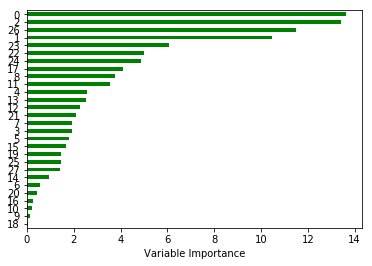

In [237]:
x1=pd.DataFrame(xtrain)
import matplotlib.pyplot as plt
Importance = pd.DataFrame({'Importance':Classifier.feature_importances_*100}, index=x1.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='g', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None